## In this file a comperison of different bodys of water inside the same picture will be made 

### Importing data

In [22]:
from hypso import Hypso1, Hypso2
import os 
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

import funcions_autonom as f
import atmosperic_correction as ac
import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

np.random.seed(42)

dir_path = "."

In [23]:
importlib.reload(f)
importlib.reload(ac)

<module 'atmosperic_correction' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/atmosperic_correction.py'>

In [24]:
path_cla_atm_250423_2 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")######

cla_atm_250423_2 = xr.open_dataset(path_cla_atm_250423_2)
latitude_250423_2 = cla_atm_250423_2['latitude']
longitude_250423_2 = cla_atm_250423_2['longitude']

In [25]:
rho_vars = [var for var in cla_atm_250423_2.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

### Defining the area

In [39]:
x_1 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
x=x_1[9:118]

target_lat_6 = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
target_lon_6 = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

target_lat_5 = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
target_lon_5 = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat_3 = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] #område 2.1.
target_lon_3 = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

target_lat_2 = [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498] #område 5.1
target_lon_2 = [9.804697410334523, 9.723689711502818,10.061035990832918,9.982929114384596]  

target_lat_1 = [63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103] #område 8 
target_lon_1 = [10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] 


target_lat_matrix = [[63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103], #1
                     [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498], #2
                     [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074], #3
                     [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004], #5
                     [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561]] #6

target_long_matrix = [[10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] , #1
                      [9.804697410334523, 9.723689711502818, 10.061035990832918, 9.982929114384596], #2
                     [9.531415429238418, 9.442656298818237, 9.526455044589706, 9.439764451470932], #3
                     [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283], #5
                     [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]] #6


### Generating the RRS

In [27]:
##felles for alle områdene 1,2,3,5,6,
latitude_250423_2 = np.array(cla_atm_250423_2['latitude'])
longitude_250423_2 = np.array(cla_atm_250423_2['longitude'])

rss_atmc_250423_2 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_2) #RSS for alle piksler, denne inneolder all info

In [28]:
rss_area_all = ac.rss_matrix_for_several_Areas_same_picture(target_lat_matrix, target_long_matrix, latitude_250423_2, longitude_250423_2, rss_atmc_250423_2)

# vurdere og hente ut listene i den doble lista og gjøre hver enkelt om til et et np.array

In [29]:
row_area_1, col_area_1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250423_2, longitude_250423_2)

median_area_1 = np.median(rss_area_all[0], axis=0)
normaized_spectrum_median_area_1 = f.min_max_nomralization(median_area_1)
l2_norm_median_area_1 = np.linalg.norm(median_area_1)  #l2 norm
l2_normalized_median_spectrum_area_1 = median_area_1 / l2_norm_median_area_1  #l2 normalisering

print("number of pixels in area:", rss_area_all[0].shape)
print("Median RSS for area:", median_area_1.shape)
print(median_area_1)


number of pixels in area: (323, 109)
Median RSS for area: (109,)
[-1.5741258e-03 -4.2156125e-03 -2.3006189e-03  1.3798068e-04
 -2.8005263e-04 -2.0698968e-03  2.9998734e-03  1.9636459e-03
  5.6514652e-03  3.3498132e-03  6.5490208e-03  3.8064199e-03
  5.4753660e-03  5.7888459e-03  5.5168006e-03  6.9935741e-03
  5.8834292e-03  6.1685885e-03  7.4418806e-03  7.2199204e-03
  7.6071611e-03  1.0210322e-02  8.5210223e-03  8.3430624e-03
  8.4510427e-03  7.2200885e-03  7.8654625e-03  9.0568066e-03
  9.5994202e-03  7.2687026e-03  9.1138827e-03  1.1909867e-02
  8.5895415e-03  8.7192869e-03  9.3393316e-03  9.4666174e-03
  8.0649694e-03  9.1057010e-03  8.5011376e-03  7.9381876e-03
  7.9798214e-03  8.1819864e-03  7.7539217e-03  7.8547047e-03
  6.8604541e-03  7.1740984e-03  6.8756090e-03  6.6744173e-03
  7.4991463e-03  8.3703920e-03  6.1954795e-03  6.1001787e-03
  5.9892437e-03  5.6817136e-03  5.7280036e-03  5.5906461e-03
  5.3579896e-03  5.3235283e-03  4.5066979e-03  4.4764844e-03
  3.5952399e-03  3.3

In [30]:
row_area_2, col_area_2 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitude_250423_2, longitude_250423_2)

median_area_2 = np.median(rss_area_all[1], axis=0)
normaized_spectrum_median_area_2 = f.min_max_nomralization(median_area_2)
l2_norm_median_area_2 = np.linalg.norm(median_area_2)  #l2 norm
l2_normalized_median_spectrum_area_2 = median_area_2 / l2_norm_median_area_2  #l2 normalisering

print("number of pixels in area:", rss_area_all[1].shape)
print("Median RSS for area:", median_area_2.shape)
print(median_area_2)

number of pixels in area: (167, 109)
Median RSS for area: (109,)
[-4.3580164e-03 -5.9292368e-03 -3.1948437e-03  8.0844382e-04
  3.9071823e-04 -1.1202969e-03  5.5205091e-03  5.1028794e-03
  1.0240208e-02  8.0821021e-03  1.2981408e-02  9.9552199e-03
  1.2788101e-02  1.3297977e-02  1.3240684e-02  1.5050749e-02
  1.3939363e-02  1.4355908e-02  1.6308455e-02  1.6343858e-02
  1.6550737e-02  1.9721618e-02  1.7654832e-02  1.7569123e-02
  1.7773969e-02  1.6326509e-02  1.7366456e-02  1.8600630e-02
  1.9571910e-02  1.6308960e-02  1.8346390e-02  2.1396387e-02
  1.7811600e-02  1.8069077e-02  1.8502722e-02  1.8613290e-02
  1.6857103e-02  1.7770164e-02  1.7050574e-02  1.6393755e-02
  1.6098892e-02  1.6297141e-02  1.5495315e-02  1.5480650e-02
  1.3909451e-02  1.4173651e-02  1.3523389e-02  1.2956010e-02
  1.3655637e-02  1.4479153e-02  1.1721599e-02  1.1386443e-02
  1.1300630e-02  1.0500045e-02  1.0413407e-02  9.9360049e-03
  9.6636461e-03  9.3596987e-03  8.2577271e-03  8.0598379e-03
  6.6770464e-03  6.2

In [31]:
row_area_3, col_area_3 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitude_250423_2, longitude_250423_2)

median_area_3 = np.median(rss_area_all[2], axis=0)
normaized_spectrum_median_area_3 = f.min_max_nomralization(median_area_3)
l2_norm_median_area_3 = np.linalg.norm(median_area_3)  #l2 norm
l2_normalized_median_spectrum_area_3 = median_area_3 / l2_norm_median_area_3  #l2 normalisering

print("number of pixels in area:", rss_area_all[2].shape)
print("Median RSS for area:", median_area_3.shape)
print(median_area_3)

number of pixels in area: (417, 109)
Median RSS for area: (109,)
[-3.55976546e-04 -3.07069486e-03 -1.06138748e-03  2.36429810e-03
 -7.96467157e-06 -1.82365160e-03  3.78107280e-03  2.26663984e-03
  6.25101384e-03  3.61800054e-03  7.29513634e-03  4.12807520e-03
  5.99831296e-03  6.44147582e-03  6.06754096e-03  7.38072116e-03
  6.18111482e-03  6.52969349e-03  7.81009812e-03  8.08595680e-03
  7.79610081e-03  1.06169228e-02  8.79636966e-03  8.88323970e-03
  8.83118901e-03  7.57768005e-03  8.25595297e-03  9.57051199e-03
  1.02200685e-02  7.52577372e-03  9.39546060e-03  1.23903910e-02
  8.86257831e-03  9.03959200e-03  9.64706112e-03  9.76936333e-03
  8.26040469e-03  9.31036845e-03  8.67789425e-03  8.10887944e-03
  8.17438401e-03  8.29191972e-03  7.80297583e-03  7.88597669e-03
  6.79616956e-03  7.13906996e-03  6.74698642e-03  6.42775511e-03
  7.25589367e-03  8.11658613e-03  5.85997896e-03  5.83389541e-03
  5.77535899e-03  5.46131516e-03  5.47109451e-03  5.33403084e-03
  5.10633271e-03  5.01332

In [32]:
row_area_5, col_area_5 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitude_250423_2, longitude_250423_2)

median_area_5 = np.median(rss_area_all[3], axis=0)
normaized_spectrum_median_area_5 = f.min_max_nomralization(median_area_5)
l2_norm_median_area_5 = np.linalg.norm(median_area_5)  #l2 norm
l2_normalized_median_spectrum_area_5 = median_area_5 / l2_norm_median_area_5  #l2 normalisering

print("number of pixels in area:", rss_area_all[3].shape)
print("Median RSS for area:", median_area_5.shape)
print(median_area_5)


number of pixels in area: (270, 109)
Median RSS for area: (109,)
[ 0.00029367 -0.00228712 -0.00017037  0.00308623  0.00010302 -0.0017795
  0.00388427  0.0022121   0.00625531  0.00356581  0.007559    0.00412466
  0.00592054  0.00652883  0.00603093  0.00719189  0.0060047   0.00627501
  0.00762543  0.00840736  0.00730717  0.01042673  0.00853209  0.00890723
  0.00858334  0.00716582  0.00798439  0.00936965  0.01013787  0.0069772
  0.0088993   0.01199435  0.00828099  0.00857222  0.00918321  0.00935593
  0.00773052  0.00879121  0.00812351  0.00760102  0.00776016  0.00774414
  0.00730204  0.00743028  0.0063474   0.0066175   0.00630844  0.00590202
  0.00677993  0.00767516  0.0053621   0.00543109  0.00537688  0.00495875
  0.00498299  0.00494803  0.00470701  0.0046461   0.00383459  0.00394321
  0.00309206  0.00291336  0.00312583  0.00285886  0.00311818  0.00271767
  0.00238133  0.00209221  0.00202125  0.00126678  0.0017184   0.00159505
  0.00143428  0.00146381  0.00115879  0.00102226  0.00077992 

In [33]:
row_area_6, col_area_6 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitude_250423_2, longitude_250423_2)

median_area_6 = np.median(rss_area_all[4], axis=0)
normaized_spectrum_median_area_6 = f.min_max_nomralization(median_area_6)
l2_norm_median_area_6 = np.linalg.norm(median_area_6)  #l2 norm
l2_normalized_median_spectrum_area_6 = median_area_6 / l2_norm_median_area_6  #l2 normalisering

print("number of pixels in area:", rss_area_all[4].shape)
print("Median RSS for area:", median_area_6.shape)
print(median_area_6)


number of pixels in area: (1218, 109)
Median RSS for area: (109,)
[ 1.68289337e-03 -9.67771048e-04  1.22166728e-03  4.05010581e-03
  1.59553601e-05 -1.71671854e-03  3.77034931e-03  2.15157634e-03
  6.17656484e-03  3.58445034e-03  7.88907334e-03  4.23180312e-03
  6.02187589e-03  6.73805550e-03  6.18717819e-03  7.25084869e-03
  5.99605450e-03  6.22820389e-03  7.73900747e-03  8.91118683e-03
  7.10627437e-03  1.06128175e-02  8.44858773e-03  9.06937569e-03
  8.70766677e-03  7.02194404e-03  7.97603279e-03  9.44847427e-03
  1.04385614e-02  6.68616593e-03  8.83915089e-03  1.22066559e-02
  8.09199736e-03  8.62788968e-03  9.14475974e-03  9.37682576e-03
  7.56411348e-03  8.74026492e-03  8.02761689e-03  7.43285473e-03
  7.69682042e-03  7.54450727e-03  7.19051808e-03  7.25637935e-03
  6.13291375e-03  6.46399055e-03  6.06131088e-03  5.58709400e-03
  6.60189893e-03  7.59960059e-03  4.97421855e-03  5.11934562e-03
  5.11143683e-03  4.71762195e-03  4.76388726e-03  4.68956353e-03
  4.45852242e-03  4.4363

### Plotting the picture 

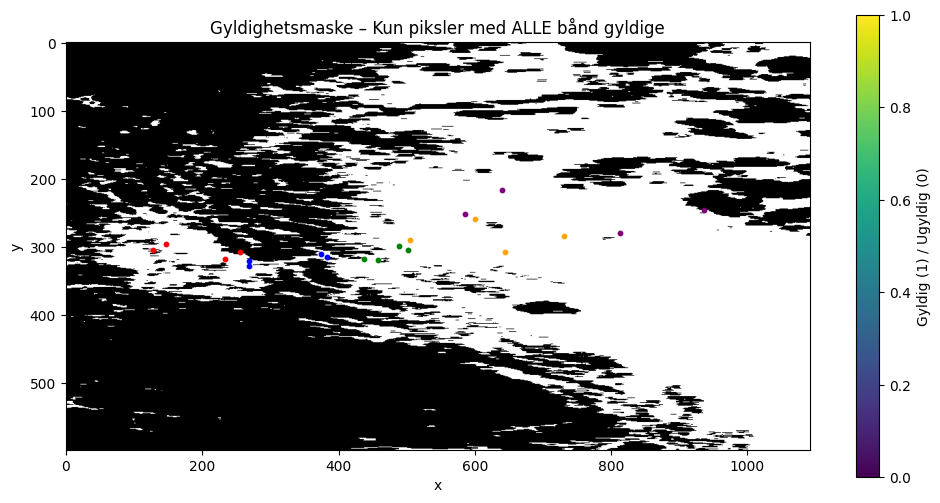

In [34]:
# Anta at `data` har formen (114, 598, 1092)
# Lag maske: True der INGEN bånd er NaN (dvs. alle 114 bånd er gyldige)

## plotte de fire områdene 
valid_mask_all = ~np.isnan(rss_atmc_250423_2).any(axis=0)  # shape: (598, 1092)

# Visualiser masken
plt.figure(figsize=(12, 6))
plt.imshow(valid_mask_all, cmap='gray')
plt.title("Gyldighetsmaske – Kun piksler med ALLE bånd gyldige")
plt.xlabel("x")
plt.ylabel("y")
#plt.scatter(458, 292, color='red', s=10)
for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(col_area_1[i], row_area_1[i] , color='red', s=10)
    plt.scatter(col_area_2[i], row_area_2[i] , color='blue', s=10)
    plt.scatter(col_area_3[i], row_area_3[i] , color='green', s=10)
    plt.scatter(col_area_5[i], row_area_5[i] , color='orange', s=10)
    plt.scatter(col_area_6[i], row_area_6[i] , color='purple', s=10)
plt.colorbar(label='Gyldig (1) / Ugyldig (0)')
plt.show()

### PLotting the RRS

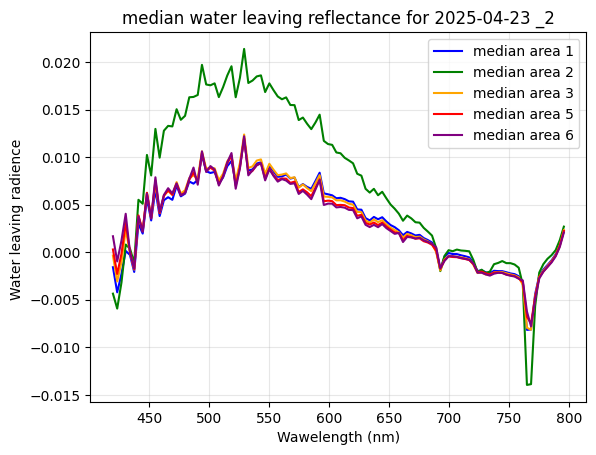

In [35]:
## plotte de fire omrpdene 
plt.plot(x, median_area_1, color='blue', label='median area 1')
plt.plot(x, median_area_2, color='green', label='median area 2')
plt.plot(x, median_area_3, color='orange', label='median area 3')
plt.plot(x, median_area_5, color='red', label='median area 5')
plt.plot(x, median_area_6, color='purple', label='median area 6')

plt.xlabel("Wawelength (nm)")
plt.ylabel("Water leaving radience ") #finne enheten her
plt.title("median water leaving reflectance for 2025-04-23 _2")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

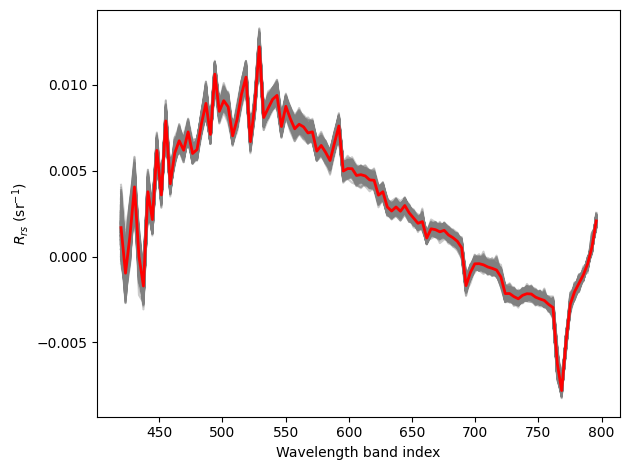

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: replace with your actual array
data = rss_area_all[4]  # shape: (n_spectra, n_bands)

# Calculate median and std across rows (for each wavelength)
median_spectrum = np.median(data, axis=0)
std_spectrum = np.std(data, axis=0)

# X-axis (e.g., wavelength index or real wavelengths)
#x = np.arange(data.shape[1])  # Replace with actual wavelengths if you have them

# Plot all individual spectra in gray
for spectrum in data:
    plt.plot(x, spectrum, color='gray', alpha=0.4)

# Plot median in red
plt.plot(x, median_spectrum, color='red', linewidth=2)

# Add standard deviation as error bars
#plt.errorbar(x, median_spectrum, yerr=std_spectrum, fmt='o', color='black', capsize=3)

# Axis labels
plt.ylabel(r'$R_{rs}$ (sr$^{-1}$)')
plt.xlabel('Wavelength band index')  # Replace if you have actual wavelength values

# Optional: Annotate plot
#plt.text(x[-1], median_spectrum[-1], "A", fontsize=12, weight='bold')

# Clean style
plt.tight_layout()
plt.show()